In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.preprocessing import normalize
from numpy.matlib import repmat

#read in UCI EEG data rom https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#
#file EEG EYE STATE.arff then converted to csv
#with https://pulipulichen.github.io/jieba-js/weka/arff2csv/
# Data represents one 117 second measurement of 14 eeg channels from
# the Emotiv EEG Neuroheadset
# the 15th data colomn is the labels of the eye state. With o representing an open eye
# and 1 representing a closed eye. 
#"The features correspond to 14 EEG measurements from the headset,
#originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order."


#my_data is a 14980 row 15 column vector np array
my_data = genfromtxt('Dunn2.csv', delimiter=',')
my_data

array([[4.32923e+03, 4.00923e+03, 4.28923e+03, ..., 4.63590e+03,
        4.39385e+03, 0.00000e+00],
       [4.32462e+03, 4.00462e+03, 4.29385e+03, ..., 4.63282e+03,
        4.38410e+03, 0.00000e+00],
       [4.32769e+03, 4.00667e+03, 4.29538e+03, ..., 4.62872e+03,
        4.38923e+03, 0.00000e+00],
       ...,
       [4.27744e+03, 3.99077e+03, 4.24667e+03, ..., 4.59179e+03,
        4.33949e+03, 1.00000e+00],
       [4.28462e+03, 3.99179e+03, 4.25128e+03, ..., 4.59641e+03,
        4.35077e+03, 1.00000e+00],
       [4.28769e+03, 3.99744e+03, 4.26000e+03, ..., 4.59795e+03,
        4.35077e+03, 1.00000e+00]])

In [2]:
my_data.shape

(14980, 15)

In [3]:
#Because large outlier spikes existed in the data and it was clear that they were not
# part of the neural signals they need to be eliminated

#eliminate cols of outlier noise
my_data = np.delete(my_data,np.s_[10384:10388],axis=0)
my_data = np.delete(my_data,np.s_[11505:11508],axis=0)
my_data = np.delete(my_data,np.s_[897:900],axis=0)
my_data = np.delete(my_data,np.s_[13168:13171],axis=0)
my_data.shape

(14967, 15)

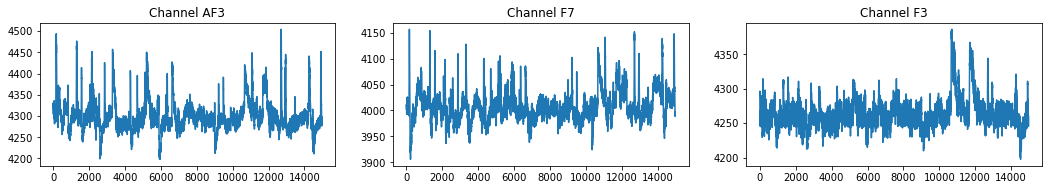

In [4]:
#Plot each individual EEG channel
# set X as a vector of numerical integer values from 1 to 14980
X = np.arange(0, 14967) 
  
# set yi to be the ith column vector in my_data
# Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14 = tuple([my_data[:,i] for i in range(15)])
Y0 = my_data[:,0]
Y1 = my_data[:,1]
Y2 = my_data[:,2]
Y3 = my_data[:,3]
Y4 = my_data[:,4]
Y5 = my_data[:,5]
Y6 = my_data[:,6]
Y7 = my_data[:,7]
Y8 = my_data[:,8]
Y9 = my_data[:,9]
Y10 = my_data[:,10]
Y11 = my_data[:,11]
Y12 = my_data[:,12]
Y13 = my_data[:,13]
Y14 = my_data[:,14]



# Initialise the subplot function using number of rows and columns with adjusted fig size
# set channels sequetially in subplot and graph
figure, axis = plt.subplots(1,3,figsize = (15,3))
  
# Channel AF3
axis[0].plot(X, Y0)
axis[0].set_title("Channel AF3")
  # Channel F7
axis[1].plot(X, Y1)
axis[1].set_title("Channel F7")
  # Channel F3
axis[2].plot(X, Y2)
axis[2].set_title("Channel F3")
  
# Combine all the operations and display with appropriate spacing
plt.tight_layout(pad=2.0)
plt.show()

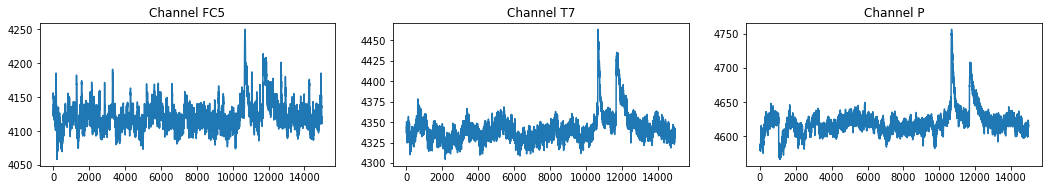

In [5]:
figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel FC5
axis[0].plot(X, Y3)
axis[0].set_title("Channel FC5")
# Channel T7
axis[1].plot(X, Y4)
axis[1].set_title("Channel T7")
# Channel P
axis[2].plot(X, Y5)
axis[2].set_title("Channel P")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

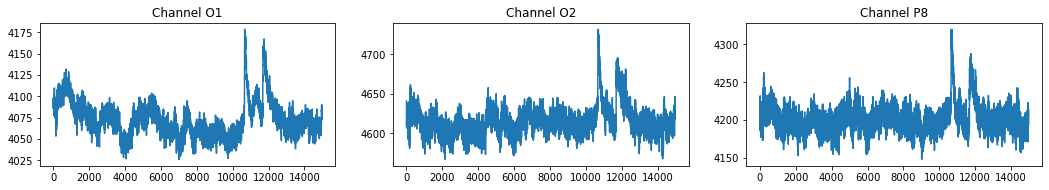

In [6]:
figure, axis = plt.subplots(1,3,figsize = (15,3))

# Channel O1
axis[0].plot(X, Y6)
axis[0].set_title("Channel O1")
# Channel O2
axis[1].plot(X, Y7)
axis[1].set_title("Channel O2")
# Channel P8
axis[2].plot(X, Y8)
axis[2].set_title("Channel P8")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

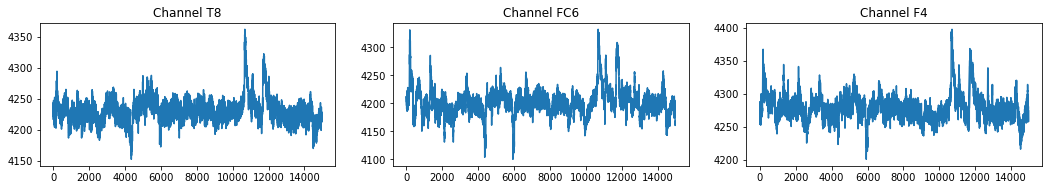

In [7]:
figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel T8
axis[0].plot(X, Y9)
axis[0].set_title("Channel T8")
# Channel FC6
axis[1].plot(X, Y10)
axis[1].set_title("Channel FC6")
# Channel F4
axis[2].plot(X, Y11)
axis[2].set_title("Channel F4")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

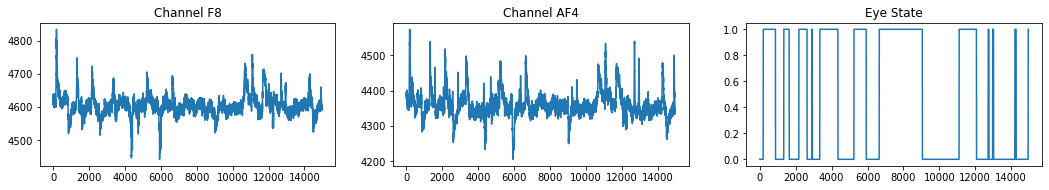

In [8]:
figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel F8
axis[0].plot(X, Y12)
axis[0].set_title("Channel F8")
# Channel AF4
axis[1].plot(X, Y13)
axis[1].set_title("Channel AF4")
# Eye State (labels)
axis[2].plot(X, Y14)
axis[2].set_title("Eye State")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

In [9]:
#Default ICA implementation -- running fastIca from scikitlearn
#num of components used will dictate how much the data is compressed
transformer = FastICA(n_components=15,
whiten='unit-variance')
my_data_transformed = transformer.fit_transform(my_data)
my_data_transformed.shape

(14967, 15)

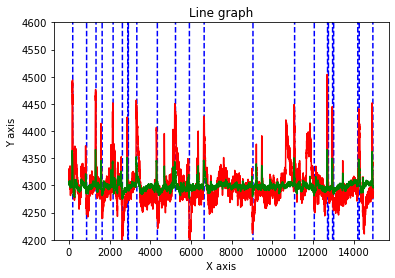

In [10]:
#plot one column vector (channel) and compare to the state column
# to see when blinks were occuring
# data to be plotted

#channelAF3 transformed by FastICA
#scaled to line up visually with untransformed data
y = (my_data_transformed[:,0]*1250)+4300
z = my_data[:,0] #Channel AF3 before FastICA
b = my_data[:,14]*5000 # Eye State column
 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(X,b , color ="blue",linestyle = "dashed")
plt.ylim(4200,4600)
plt.plot(X, z, color ="red")
plt.plot(X, y, color ="green")
plt.show()

The visualization above represents channel AF4 before transformation (red), after transformation (green), and when blinking was occuring (blue dashed line).

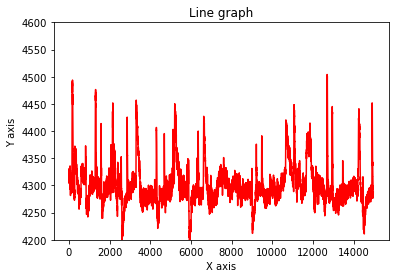

In [11]:
#First Channel before ICA
x = np.arange(0, 14967)
y = my_data_transformed[:,0]
z = my_data[:,0]
 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.ylim(4200,4600)
plt.plot(x, z, color ="red")
plt.show()

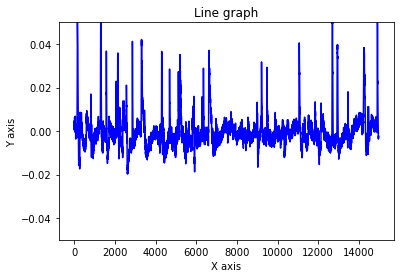

In [12]:
# First Channel After Ica
x = np.arange(0, 14967) 
y = my_data_transformed[:,0]
z = my_data[:,0]
 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="blue")
plt.ylim(-.05,.05)
plt.plot(x, z, color ="red")
plt.show()

In [13]:
#Separate the eye blink data and the EEG channel data
eye_data = my_data[:,14]
my_data = my_data[:,:14]

Next, we have our own custom implementation of Principal Component Analysis. Principal Component Analysis is used to preprocess and decorrelate our data for the next step of Independent Component Analysis.

In [14]:
means = np.mean(my_data, axis=1, keepdims = True)

#zero means and transpose matrix
zeroed_data = my_data - np.matlib.repmat(means, 1, 14)#15)
zeroed_data.shape

(14967, 14)

In [15]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

D, V = np.linalg.eig(zeroed_data.transpose()@zeroed_data)
V, D = eigsort(V, D)

U = zeroed_data@V
U = normalize(U, norm='l2', axis=0)
U.shape

(14967, 14)

In [16]:
c = U.T @ zeroed_data[:,7] #Shape: (15,)
# print(reconstructed.shape) #Shape (15,15)
#zeroed_data = my_data - np.matlib.repmat(means, 1, 15)
z = U@np.array((c[:, np.newaxis]))+means
z3 = U[:,:4]@np.array((c[:4][:, np.newaxis]))+means
# z3.shape
#means.shape

In [17]:
reconstructed = U.T @ zeroed_data[:,:]
reconstructed_for_ica = U[:,:5]@np.array((reconstructed[:5][:]))
reconstructed_for_ica.shape
U.shape

(14967, 14)

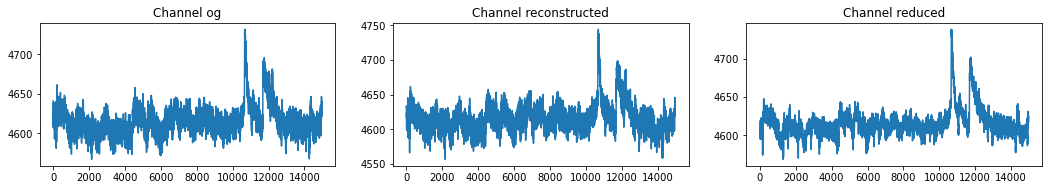

In [18]:
#Set vals
Y7 = my_data[:,7]
Y7rec = z[:,0]
Y7red = z3[:,0]

figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel T7 original
axis[0].plot(X, Y7)
axis[0].set_title("Channel og")
# Channel T7 reconstructed
axis[1].plot(X, Y7rec)
axis[1].set_title("Channel reconstructed")
# Channel T7 reconstructed w first 10 PC's
axis[2].plot(X, Y7red)
axis[2].set_title("Channel reduced")

# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

Once we've run Principal Component Analysis, we are able to define and run our Independent Component Analysis.

In [19]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
def g(x):
    return np.tanh(x)

#g'(x) = 1-tanh^2(x)
def g_der(x):
    return 1 - np.tanh(x) ** 2

def scale(X):
    #For decorrelated mixture signals projected to PCA space as U = VD
    #Z =(λ^(-1/2))U = (λ^(-1/2))VD
    pass

def recalculate_w(w, X):
    w_new = (X * g(w.T@X)).mean(axis=1) - g_der(w.T@X).mean() * w    
    w_new /= np.sqrt((w_new ** 2).sum())    
    return w_new

In [21]:
def ica(X, iterations, tolerance):
#     X = preprocess(X)  #Center by subtracting mean, then remove potential correlations between component (whitening)
    components_count = X.shape[0]
    print(components_count)
    W = np.zeros((components_count, components_count), dtype=X.dtype) #Initialize empty weights matrix
    
    for i in range(components_count):
        w = np.random.rand(components_count)
        j = 0
        converged = False
        while j < iterations and not converged:
            w_new = recalculate_w(w, X)
            
            if i >= 1:
                w_new -= (w_new@W[:i].T)@W[:i]
            
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            w = w_new
            
            if distance < tolerance:
                converged = True
                
            j+=1
                
        W[i, :] = w
        
    S = W@X
    
    return S

In [22]:
def plot_results(X, S):
    
    fig = plt.figure()    
    plt.subplot(2, 1, 1)
    
    for x in X:
        plt.plot(x)
    plt.title("Mixed Signal")  
#     plt.ylim(-500,1000)
    plt.subplot(2, 1, 2)
    for s in S:
        plt.plot(s)
    plt.title("Predicted Signals-")
#     plt.ylim(-1000,500)
    plt.tight_layout()
    plt.show()
print(U[:,:5].shape)


(14967, 5)


In [23]:
# S = ica(reconstructed_5_components.T, 50, 1e-5)
S = ica(U[:,:5].T, 15, 1e-5)
# print(reconstructed_5_components.T.shape)
print(S.shape)

5
(5, 14967)


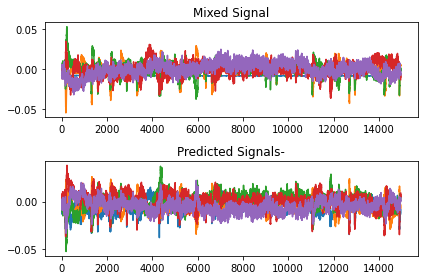

In [24]:
# plot_results(reconstructed_5_components.T[:5], S[:5])
plot_results(U[:,:5].T, S[:5])

Channel 1 :
 [-0.00844545 -0.01008491 -0.01148017 ... -0.01175457 -0.01277408
 -0.01302131]


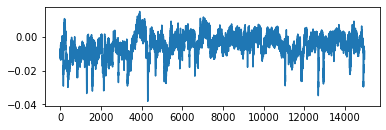

Channel 2 :
 [ 0.0040017   0.00436968  0.00658991 ... -0.00664309 -0.00429198
 -0.00394639]


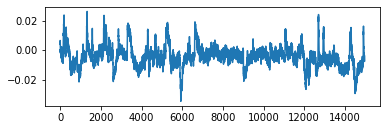

Channel 3 :
 [0.00132098 0.00346666 0.00555176 ... 0.00226111 0.00362344 0.00463351]


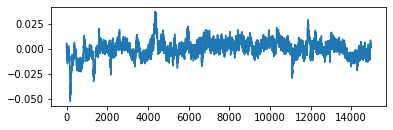

Channel 4 :
 [0.00595473 0.00586893 0.00492982 ... 0.00466298 0.00672179 0.00888739]


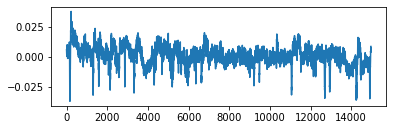

Channel 5 :
 [-0.00721726 -0.00604748 -0.00663546 ...  0.00426758  0.00367677
  0.00405349]


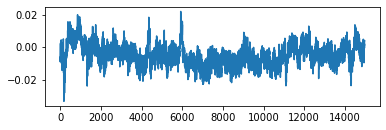

In [25]:
for i, s in enumerate(S[:5]):
    print("Channel", (i+1), ":\n", s)
    plt.subplot(2, 1, 2)
    plt.plot(s)
    plt.show()

In [26]:
#Manually removing predicted blink channels
#Graphs #3 and 5 have peaks correlated with the timestamps of blinks, so we'll remove them to focus on relevant EEG data.
remove_indices = [2,4]
S[remove_indices, :] = 0

array([[-0.00844545, -0.01008491, -0.01148017, ..., -0.01175457,
        -0.01277408, -0.01302131],
       [ 0.0040017 ,  0.00436968,  0.00658991, ..., -0.00664309,
        -0.00429198, -0.00394639],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00595473,  0.00586893,  0.00492982, ...,  0.00466298,
         0.00672179,  0.00888739],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Channel 1 :
 [-0.00844545 -0.01008491 -0.01148017 ... -0.01175457 -0.01277408
 -0.01302131]


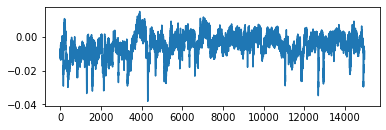

Channel 2 :
 [ 0.0040017   0.00436968  0.00658991 ... -0.00664309 -0.00429198
 -0.00394639]


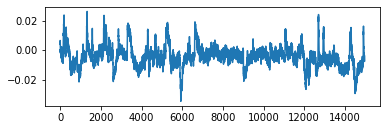

Channel 3 :
 [0. 0. 0. ... 0. 0. 0.]


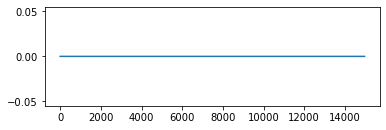

Channel 4 :
 [0.00595473 0.00586893 0.00492982 ... 0.00466298 0.00672179 0.00888739]


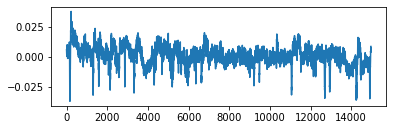

Channel 5 :
 [0. 0. 0. ... 0. 0. 0.]


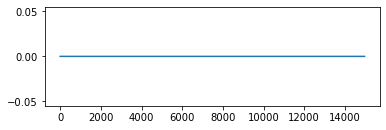

In [27]:
for i, s in enumerate(S):
    print("Channel", (i+1), ":\n", s)
    plt.subplot(2, 1, 2)
    plt.plot(s)
    plt.show()